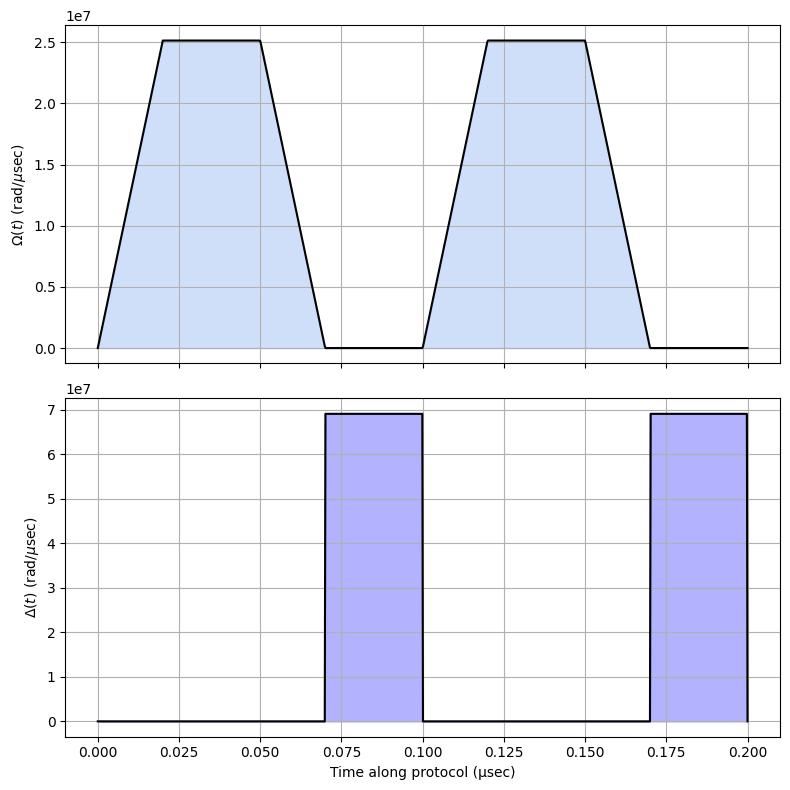

In [20]:
import numpy as np
import matplotlib.pyplot as plt

T_rise = 0.02e-6
T_flat = 0.03e-6
T_max = 0.2e-6  
Omega_max = 4 * 2 * np.pi * 1e6
Delta_max = 11 * 2 * np.pi * 1e6
Phi_val = 2.0    


t = np.linspace(0, T_max, 1000)

pulse_duration = T_rise + T_flat
num_pulses = int(T_max / (2 * pulse_duration)) 
Omega_t = np.zeros_like(t)
Delta_t = np.zeros_like(t)

for i in range(num_pulses):
    start = 2 * i * pulse_duration
    end_rise = start + T_rise
    end_flat = end_rise + T_flat
    end_fall = end_flat + T_rise

    Omega_t += np.piecewise(
        t,
        [t < start, (t >= start) & (t < end_rise), (t >= end_rise) & (t < end_flat), (t >= end_flat) & (t < end_fall), t >= end_fall],
        [0, lambda t: (Omega_max / T_rise) * (t - start), Omega_max, lambda t: Omega_max * (1 - (t - end_flat) / T_rise), 0]
    )

    Delta_t += np.piecewise(
        t,
        [t < end_fall, (t >= end_fall) & (t < end_fall + T_flat), (t >= end_fall + T_flat) & (t < end_fall + 2 * T_flat), t >= end_fall + 2 * T_flat],
        [0, Delta_max, 0, 0]
    )

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axs[0].plot(t * 1e6, Omega_t, color='black')
axs[0].fill_between(t * 1e6, Omega_t, color='cornflowerblue', alpha=0.3)
axs[0].set_ylabel(r'$\Omega(t)$ (rad/$\mu$sec)')
axs[0].grid(True)

axs[1].plot(t * 1e6, Delta_t, color='black')
axs[1].fill_between(t * 1e6, Delta_t, color='blue', alpha=0.3)
axs[1].set_ylabel(r'$\Delta(t)$ (rad/$\mu$sec)')
axs[1].grid(True)

plt.xlabel("Time along protocol (μsec)")
plt.tight_layout()
plt.show()
